# Logistic regression

Logistic regression is a supervised binomial classification algorithm

## Covered in this notebook
* Using an unknown but already clean dataset with panda
* Simple logistic regression
* Polynomial logistic regression
* Regularization
* Implementation by hand and with scikit-learn
* Cost function minimization with scipy fmin (No more [gradient descent](./SimpleLinearRegression.ipynb#definition))
* Visualisation of how the hyperparameters influence the decision boundary with seaborn and matplotlib
## Not covered in this notebook
* Multinomial logistic regression (Softmax)
* Cross validation
* Features with many dimensions to have intuitive visualizations
* Model evaluation: f1-score, precision vs recall, cross validation
* ...

## Description

This algorithm makes the hypothesis that there is a linear separation between a set of features $X$ and a binary result

The goal is to find this separation line. For this, one predicts a percentage of confidence between 0 and 1 of whether or not the example belongs to a given category

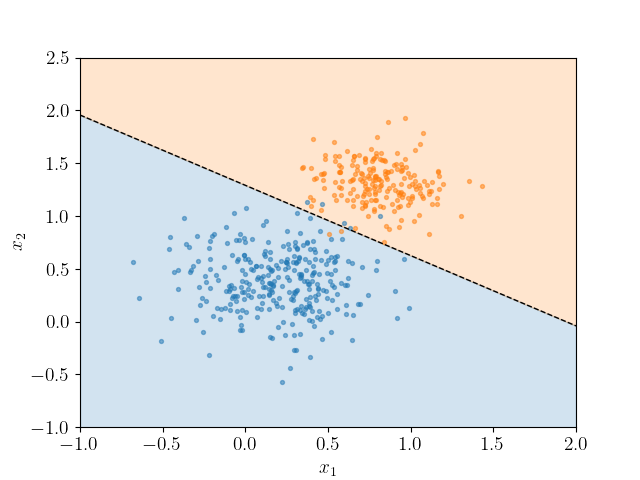

In [1]:
from IPython.display import Image # Using ipython to display images in gitlab too
Image(filename='img/logistic-regession-decision-boundary.png', width=500)

<sub><sup>
image from [scipython.com](https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/)
</sup></sub>

In this example, the linear separation or decision boundary is a straight line, so the hypothesys will be of the form $ax + b$. Another form is a vector $\theta$ that will be multiplicated by the features vector of one example $x$: $\theta ^Tx = \theta_0 * x_0 + \theta_1 * x_1 + \theta2 * ...$ etc

To allow us to predict a ratio, this expression is passed to a function called the sigmoid function. Sigmoid have for caracteristics to give a result between 0 and 1 with infinite asymptots:

$$\sigma(z) = \frac1{1 + e^{-z}}$$

$$h(x) = \sigma(\theta ^Tx)$$

<sub><sup>
taken from the [Coursera Machine learning course](https://www.coursera.org/learn/machine-learning)
</sup></sub>

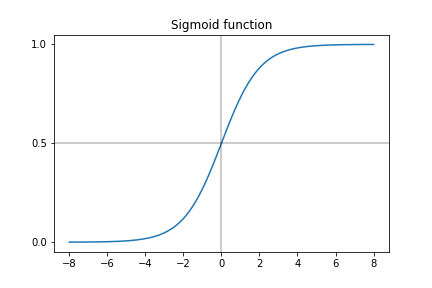

In [2]:
from IPython.display import Image # Using ipython to display images in gitlab too
Image(filename='img/logistic-regression-sigmoid.png')

<sub><sup>
code to generate the sigmoid plot: [here](#sigmoid_code)
</sup></sub>

The task of logistic regression is to find the parameters $\theta$ that predicts well if one example belongs to a target category.

For this, just as in [simple linear regression](./SimpleLinearRegression.ipynb), one must find a way to evaluate how well a set of theta predicts the target category, an minimize this error, the cost function.

The cost function for logistic regression is in the form:


$$ J(\theta) = \frac1{m}\sum_{i=1}^m[-y^{(i)} log( h_\theta(x^{(i)}) ) - (1 - y^{(i)}) log(1 - h_\theta(x^{(i)}) ) ]$$

<sub><sup>
taken from the [Coursera Machine learning course](https://www.coursera.org/learn/machine-learning)
</sup></sub>

This cost function can be decomposed in two parts:

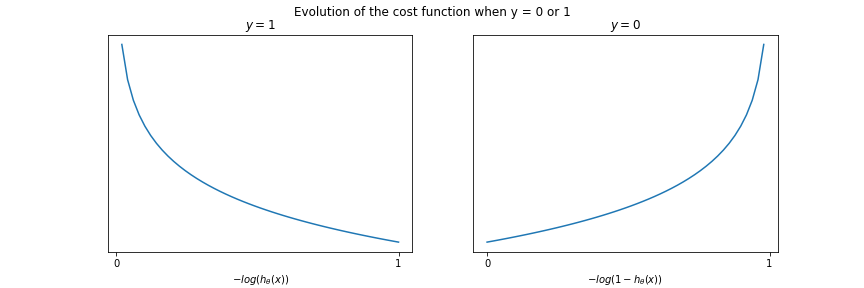

In [3]:
from IPython.display import Image # Using ipython to display images in gitlab too
Image(filename='img/logistic_regression_log_h_x.png')

<sub><sup>
code to generate thoose plots: [here](#log_code)
</sup></sub>

The first part $y^{(i)} = 0$ when $y = 0$ and the second part $(1 - y^{(i)}) = 0$ when $y = 1$ giving a single convex function for both possible targets.





Having a cost function with an hypothesis, one can now try and optimise the error of  $h_\theta(x)$. One way of doing this is using gradient descent, as used in [simple linear regression](./SimpleLinearRegression.ipynb).

However, some other optimisation methods exists. A handy implementation of gradient descent is good for understanding, but many scientific libraries will have some more efficient implementations to use. The coursera machine learning course uses the fminfunc function, a python equivalent is the scipy fmin function. Let's use this in place of a gradient descent.

## Simple logistic regression

### The dataset

The dataset comes from [kaggle](https://www.kaggle.com/dragonheir/logistic-regression), it contains data about social media ads: Age, Estimated salary, gender and wether or not a user purchased.




In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

dataset = pd.read_csv('datasets/Social_Network_Ads.csv')

# Check for NaN and Inf values
print('Is there NaN or Inf in the dataset:', dataset.replace(np.inf, np.nan).isnull().any().any())

# Let's take a look at the dataset
display(dataset.head())


Is there NaN or Inf in the dataset: False


User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

### Linear relationship

Let's check if possible linear relationship is could be found in this dataset:
For simplicity, we will first look for a linear relationship that can be expressed as a straight line ($ax + b$)

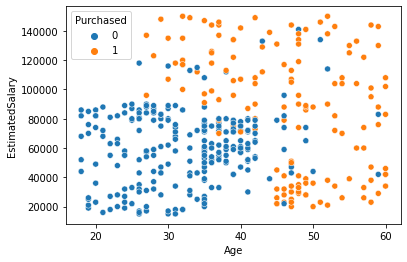

In [5]:
sns.scatterplot(data=dataset, x="Age", y="EstimatedSalary", hue="Purchased");

It looks like a straight line could eventually predict well if user will purchase or not.

We will look later about how to predict a "non straight" relationship.

In [6]:
# Setting up the data for training

X = dataset[["Age", 'EstimatedSalary']]
m = len(X)
X['Bias'] = np.ones(m)
X = X.astype('float64')
y = dataset['Purchased']
X.head()

Age  EstimatedSalary  Bias
0  19.0          19000.0   1.0
1  35.0          20000.0   1.0
2  26.0          43000.0   1.0
3  27.0          57000.0   1.0
4  19.0          76000.0   1.0

### Handy implementation

#### The cost function

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(X, thetas):
    return sigmoid(X.dot(thetas))

def cost_function(thetas, X, y, m):
    hx = predict(X, thetas)
    cost = 1 / m * np.sum(-y * np.log(hx) - (1 - y) * np.log(1 - hx))
    return cost

#### Fitting the dataset using scipy fmin optimizer (replaces gradient descent)

In [8]:
%%time
import scipy as scp

thetas = scp.optimize.fmin(cost_function, [0, 0, 0], args=(X, y, m))
print(f"parameters found: {thetas}")

Optimization terminated successfully.
         Current function value: 0.346314
         Iterations: 165
         Function evaluations: 292
parameters found: [ 2.33490862e-01  3.59009407e-05 -1.24340421e+01]
CPU times: user 419 ms, sys: 14.7 ms, total: 434 ms
Wall time: 415 ms


#### Checking how well the logistic regression performed

In [9]:
predicts = predict(X, thetas) > 0.5
accuracy = np.sum(predicts == y) / m

print(f"Accuracy on the dataset: {accuracy}")

Accuracy on the dataset: 0.845


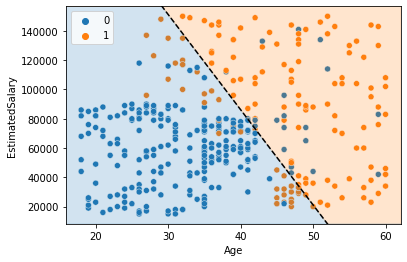

In [10]:
ax = sns.scatterplot(data=dataset, x="Age", y="EstimatedSalary", hue="Purchased")

x_vals = np.linspace(*ax.get_xlim())
#     t0 * X0 + t1 * X1 + t2 = 0
# <=> X1 = -(t0 * X0 - t2) / t1
y_vals = -(thetas[0] * x_vals + thetas[2]) / thetas[1]

x_lims = ax.get_xlim()
y_lims = ax.get_ylim()

# Display the boundary line and regions
ax1 = sns.lineplot(x=x_vals, y=y_vals, ls='--', color='k')
ax1.fill_between(x_vals, y_vals, y_lims[0], color='tab:blue', alpha=0.2)
ax1.fill_between(x_vals, y_vals, y_lims[1], color='tab:orange', alpha=0.2)

# Limit the plot to the first scatterplot limits
ax1.set_ylim(y_lims)
ax1.set_xlim(x_lims);


### The scikitlearn version


In [11]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

# Using newton-cg solver as the default one (lbfgs)
# would require feature scaling to fit this dataset
clf = LogisticRegression(random_state=0, solver='newton-cg').fit(X, y)
y_pred = clf.predict(X)
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.92      0.88       257
           1       0.83      0.71      0.77       143

    accuracy                           0.84       400
   macro avg       0.84      0.82      0.83       400
weighted avg       0.84      0.84      0.84       400

CPU times: user 341 ms, sys: 16.7 ms, total: 357 ms
Wall time: 380 ms


### Adding polynomial features

We've seen that both implementations perform well without any work on the dataset (that was already some kind of ready to use)

Looking at the dataset, we can suppose that a curved line could somehow have better results that a straight line.
For this, we can change the shape of the hypothesis to have a higher dimension polynom:

passing from $ax + b = 0$ to something more like $ax + bx^2 + cx^3 + ... + c = 0$

Let's create a function that will allow to do this


In [12]:
from sklearn.preprocessing import StandardScaler

# Inspired from the mapFeature function from the week 3 programming exercice
# of the coursera machine learning course
def to_poly(X, n_dims):
    # Removing bias columnt
    to_process = X.iloc[:,:-1]

    for i in range(1, n_dims):
        for j in range(1, n_dims):
            x0, x1 = to_process.iloc[:,0], to_process.iloc[:,1]
            to_process[f'[{i - j} {j}]'] = x0.pow(i-j) * x1.pow(j)

    to_process['Bias'] = X['Bias']
    return to_process

polynomial_terms = 5
X_poly = to_poly(X, polynomial_terms)

X_poly.columns.values

array(['Age', 'EstimatedSalary', '[0 1]', '[-1 2]', '[-2 3]', '[-3 4]',
       '[1 1]', '[0 2]', '[-1 3]', '[-2 4]', '[2 1]', '[1 2]', '[0 3]',
       '[-1 4]', '[3 1]', '[2 2]', '[1 3]', '[0 4]', 'Bias'], dtype=object)

We have a function of the form $x_1 + x_2 + x_1^0 * x_2^1 + x_1^{-1} * x_2^2 + $ ... which have the potencial of nicely fit the dataset.

This polynomial terms creation function was taken from the coursera machine learning course. Thus understanding how to create some good polynomial terms will require a full notebook by itself (TODO: link)

#### Handy version

In [13]:
%%time
num_features = len(X_poly.columns)
thetas = scp.optimize.fmin(cost_function, [0] * num_features, args=(X_poly, y, m), ftol=1e-10)
predicts = predict(X_poly, thetas) > 0.5
accuracy = np.sum(predicts == y) / m
print(f"Accuracy on the dataset: {accuracy}")

Accuracy on the dataset: 0.895
CPU times: user 5.01 s, sys: 0 ns, total: 5.01 s
Wall time: 5 s


#### Scikit-learn version

In [14]:
%%time
clf = LogisticRegression(solver='newton-cg').fit(X_poly, y)
y_pred = clf.predict(X_poly)
sklearn_report = classification_report(y, y_pred, output_dict=True)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       257
           1       0.88      0.46      0.61       143

    accuracy                           0.79       400
   macro avg       0.82      0.71      0.73       400
weighted avg       0.80      0.79      0.76       400

CPU times: user 136 ms, sys: 5.93 ms, total: 141 ms
Wall time: 137 ms


Plotting the results to see how the algorythms perfomed

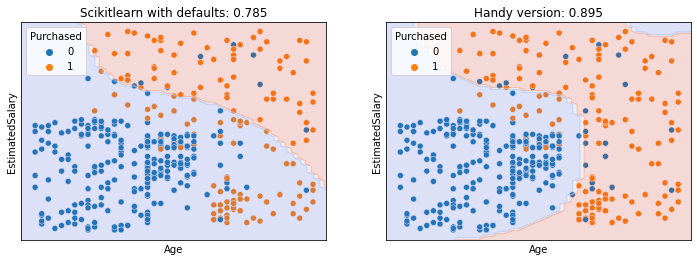

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax0 = sns.scatterplot(data=X_poly, x="Age", y="EstimatedSalary", hue=y, ax=ax[0])

# Generating x0 and x1 for the whole scatterplot space
# from ~20 to ~60 years and from ~20000 to ~140000 estimated salary
x_lims = ax0.get_xlim()
y_lims = ax0.get_ylim()
xx, yy = np.meshgrid(np.arange(*x_lims, 1),
                     np.arange(*y_lims, 2000))
full = np.c_[xx.ravel(), yy.ravel()]
ax0.cla()

# Generating polynomial features from the features of the plot space
df = pd.DataFrame()
df['x'] = full[:,0]
df['y'] = full[:,1]
df['Bias'] = np.ones(len(full))
df_poly = to_poly(df, polynomial_terms)

# Plotting the decisions boundaries
def plot_decision_boundaries(title, ax, predictions):
    ax.set_title(title)
    sns.scatterplot(data=X_poly, x="Age", y="EstimatedSalary", hue=y, ax=ax)
    ax.contourf(xx, yy, predictions, cmap='coolwarm', alpha=0.2)
    ax.set_xticks([])
    ax.set_yticks([])

predictions = clf.predict(df_poly).reshape(xx.shape)
plot_decision_boundaries(f'Scikitlearn with defaults: {sklearn_report["accuracy"]}', ax[0], predictions)

preds_mult = predict(df_poly, thetas) > 0.5
predictions = preds_mult.to_numpy().reshape(xx.shape)
plot_decision_boundaries(f'Handy version: {accuracy}', ax[1], predictions)


So we have a model that can fit very well the trained dataset. However, in a real world situation, such a fit may result in overfitting and predicting pretty badly on unknown examples.

To prevent this, we add what is called regularization to the model. It is a method which prevents the model to give too much of importance to a specific feature. The higher polynomial feature that will have some very high values for example.

We can see from the plot above, that skikit-learn already have some regularization by default. let's add it to the handy implementation

### Regularization

Regularization is a way to flatten the thetas so that no polynomial term will have too much of importance on the final cost

The maths behind this is given by the formula

$$ J_{reg}(\theta) = J(\theta) + \frac\lambda{2m} \sum_{j=1}^n \theta_j^2 $$

<sub><sup>
taken from the [Coursera Machine learning course](https://www.coursera.org/learn/machine-learning)
</sup></sub>


In [16]:

def reg_cost_function(thetas, X, y, m, l):
    cost = cost_function(thetas, X, y, m)
    reg = l / (2 * m) * sum(np.power(thetas, 2))
    return cost + reg


In [17]:

cost = cost_function(thetas, X_poly, y, m)
reg_cost = reg_cost_function(thetas, X_poly, y, m, 1000)

print(f'Cost: {cost:.2f}, Regularized cost: {reg_cost:.2f}, Reguarization value: {cost - reg_cost}')


Cost: 0.41, Regularized cost: 0.41, Reguarization value: -2.7755575615628914e-16


We can see that our regularization is really too low to be significant. This is due to to fact that our features are on a too big difference of range: ~20 to ~70 year compared to ~20000 to ~150000 $. With the polynomial terms, the features comes to such a big difference.

To prevent this, we can use the standardization as in [multiple linear regression](./MultipleLinearRegression.ipynb#feature_scaling) with the StandardScaler from scikit-learn for convenience

Let's bring this together in a plot that gives a sence of how polynomial terms and regularization have impact on logistic regression


In [18]:
from sklearn.preprocessing import StandardScaler

image_path = 'img/logistic_regression_poly_and_regularization.png'
raise Exception('Comment me to recompute the plot')

fig, ax = plt.subplots(4,4, figsize=(24, 16))

n_poly_terms = [2, 5, 7, 10]
lambda_terms = [0, 10, 100, 1000]

n = 1
for j, k in enumerate(n_poly_terms):

    # Create polynomial features and standardize
    X_poly_plot = to_poly(X, k)
    num_features = len(X_poly_plot.columns)
    scaler = StandardScaler().fit(X_poly_plot)
    X_poly_scaled = scaler.transform(X_poly_plot)

    # Prepare the plot space features
    df_poly_plot = to_poly(df, k)
    df_poly_scaled = scaler.transform(df_poly_plot)

    for i, l in enumerate(lambda_terms):
        print(n, end='' if n < 16 else '\n') # cheap tqdl progress bar
        n += 1
        # Train the model
        thetas_reg = scp.optimize.fmin(reg_cost_function, [0] * num_features,
                                       (X_poly_scaled, y, m, l), disp=0, ftol=1e-10)
        # Compute accuracy on the train set
        p = predict(X_poly_scaled, thetas_reg) > 0.5
        acc = np.sum(p == y) / m
        # Predict on the plot space
        preds_reg = predict(df_poly_scaled, thetas_reg) > 0.5
        predictions = preds_reg.reshape(xx.shape)
        # Draw and save plot to see the pogress
        plot_decision_boundaries(f'{num_features} features, lambda: {l} => {acc} acc', ax[j][i], predictions)
        ax[j][i].axes.xaxis.set_visible(False)
        ax[j][i].axes.yaxis.set_visible(False)
        fig.savefig(image_path)



Exception: Comment me to recompute the plot

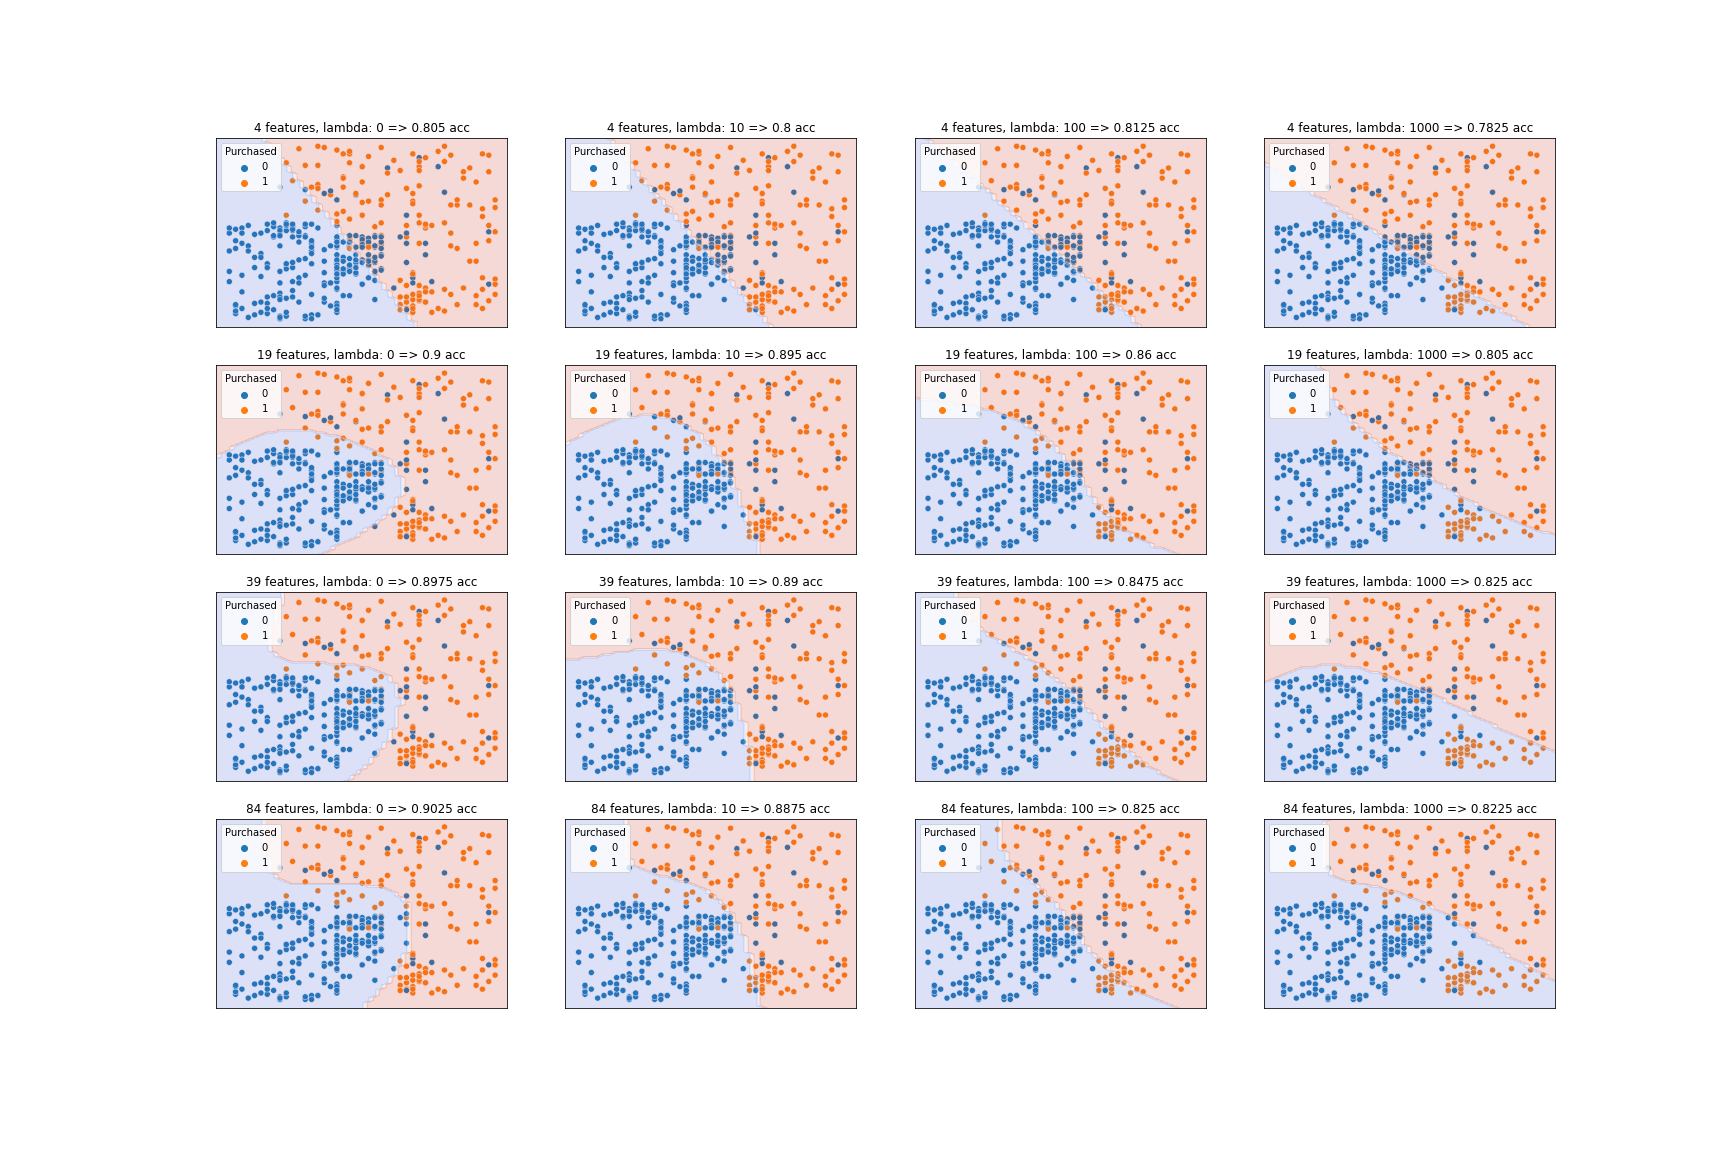

In [19]:
from IPython.display import Image
Image(filename=image_path, width=800) # Computation cut because it takes a few minutes to compute


To interpret this figure, we could say that fitting correctly a dataset will require a good balance bettwen:

* The number of polynomial terms.
Having too much will result in overfitting and adding some may help having better prediction with the cost of computational time

* The amount of regularization.
Adding some will prevent overfitting but too much will result in underfitting, even with a very good hypothesis

One good way of seeing the effect of both when the dimensions of the features (more than 2 or 3 features) does'nt allow to plot some decision boundaries is to plot a metric of the algorithm with some variations (TODO:link) for example accuracy over the amount of regularization.

# Conclusion

Using an unknow dataset that looks by all means educational (easy relation with clean data) we achieved to create and fit a model to the trainging data pretty well.
We've seen some kind of limitation of logistic regression using a straight line as hypothesis. And how adding some polynomial terms can help having better predictions. Taking care of the problem of overfitting with too much polynomial terms with regularization.

## What's next

It could be a good thing to look at how to use logistic regression to predic multiple class (softmax etc)

How to choose the polynomial terms

TODO: More to come

<a id='log_code'></a>

Code to generate the log functions plots

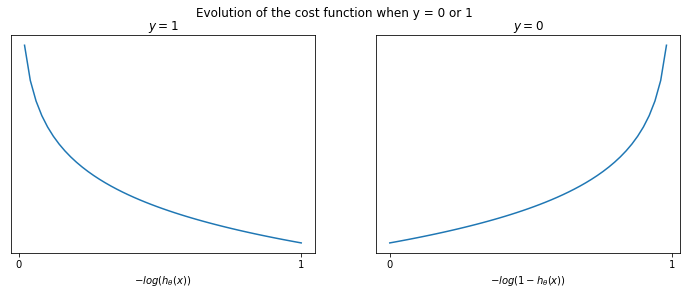

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(0, 1, 50)
y1 = -np.log(x)
y0 = -np.log(1-x)

fig, ax = plt.subplots(1,2, figsize=(12, 4))

ax1 = sns.lineplot(x=x, y=y1, ax=ax[0])
ax1.set_yticks([])
ax1.set_xticks([0, 1])
ax1.set_xlabel(r'$-log(h_\theta(x))$')
ax1.set_title(r'$y = 1$')

ax2 = sns.lineplot(x=x, y=y0, ax=ax[1])
ax2.set_yticks([])
ax2.set_xticks([0, 1])
ax2.set_xlabel(r'$-log(1 - h_\theta(x))$')
ax2.set_title(r'$y = 0$')

fig.suptitle('Evolution of the cost function when y = 0 or 1')
fig.savefig('img/logistic_regression_log_h_x')


<a id='sigmoid_code'></a>

Code to generate the sigmoid function plot

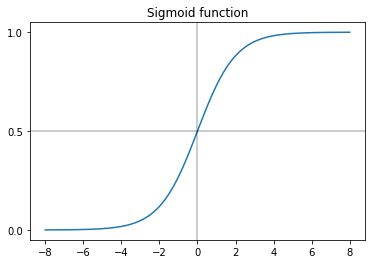

In [21]:
import numpy as np
import seaborn as sns

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-8, 8, 100)
ax = sns.lineplot(x=x, y=sigmoid(x))
ax.axhline(y=0.5, color='k', linewidth=0.4)
ax.axvline(x=0, color='k', linewidth=0.4)
ax.set_yticks([0.0,0.5,1.0])
ax.set_title('Sigmoid function')
ax.get_figure().savefig('img/logistic-regression-sigmoid.png')